**Time Sereis Forecasting Iris Weather with LSTM and experiment other Deep Learning model (GRU, CNN, Transformer)**

In [1]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


source dataset: https://www.kaggle.com/datasets/conorrot/irish-weather-hourly-data

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Dataset /hrly_Irish_weather.csv")
df

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (5,6,7,8,9,10,11,12,13,14,15,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,county,station,latitude,longitude,date,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir,sun,vis,clht,clamt
0,Galway,ATHENRY,53.289,-8.786,26-jun-2011 01:00,0.0,15.3,14.5,13.9,15.8,90,1016.0,8,190,NaN,NaN,NaN,NaN
1,Galway,ATHENRY,53.289,-8.786,26-jun-2011 02:00,0.0,14.7,13.7,12.9,14.9,89,1015.8,7,190,NaN,NaN,NaN,NaN
2,Galway,ATHENRY,53.289,-8.786,26-jun-2011 03:00,0.0,14.3,13.4,12.6,14.6,89,1015.5,6,190,NaN,NaN,NaN,NaN
3,Galway,ATHENRY,53.289,-8.786,26-jun-2011 04:00,0.0,14.4,13.6,12.8,14.8,90,1015.3,7,180,NaN,NaN,NaN,NaN
4,Galway,ATHENRY,53.289,-8.786,26-jun-2011 05:00,0.0,14.4,13.5,12.7,14.7,89,1015.1,6,190,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4660418,Kerry,VALENTIA OBSERVATORY,51.938,-10.241,31-may-2020 20:00,0.0,16.5,13.5,10.9,13.0,69,1020.5,2,250,,,,
4660419,Kerry,VALENTIA OBSERVATORY,51.938,-10.241,31-may-2020 21:00,0.0,17.3,13.0,9.1,11.6,58,1020.8,2,240,,,,
4660420,Kerry,VALENTIA OBSERVATORY,51.938,-10.241,31-may-2020 22:00,0.0,16.6,12.2,8.0,10.7,56,1021.5,4,80,,,,
4660421,Kerry,VALENTIA OBSERVATORY,51.938,-10.241,31-may-2020 23:00,0.0,17.8,12.5,7.4,10.3,50,1021.4,5,100,,,,


## Data Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4660423 entries, 0 to 4660422
Data columns (total 18 columns):
 #   Column     Dtype  
---  ------     -----  
 0   county     object 
 1   station    object 
 2   latitude   float64
 3   longitude  float64
 4   date       object 
 5   rain       object 
 6   temp       object 
 7   wetb       object 
 8   dewpt      object 
 9   vappr      object 
 10  rhum       object 
 11  msl        object 
 12  wdsp       object 
 13  wddir      object 
 14  sun        object 
 15  vis        object 
 16  clht       object 
 17  clamt      object 
dtypes: float64(2), object(16)
memory usage: 640.0+ MB


In [ ]:
df['station'].value_counts()

BELMULLET               266617
CASEMENT                266617
CORK AIRPORT            266617
DUBLIN AIRPORT          266617
SHANNON AIRPORT         266617
MALIN HEAD              266617
MULLINGAR               266617
VALENTIA OBSERVATORY    266616
CLAREMORRIS             266580
ROCHES POINT            247296
KNOCK AIRPORT           208938
FINNER                  193411
MOORE PARK              147576
OAK PARK                147576
SherkinIsland           141024
MACE HEAD               138480
JOHNSTOWNII             135192
NEWPORT                 135144
BALLYHAISE              133704
PHOENIX PARK            120144
MARKREE                 108888
DUNSANY                 108887
MT DILLON               108192
GURTEEN                 108144
ATHENRY                  78312
Name: station, dtype: int64

Pick pattern with station is ATHENRY

In [4]:
df = df[df['station'] == 'ATHENRY']

In [5]:
df.dropna(axis = 1)
df.isnull().sum()

county           0
station          0
latitude         0
longitude        0
date             0
rain             0
temp             0
wetb             0
dewpt            0
vappr            0
rhum             0
msl              0
wdsp             0
wddir            0
sun          78312
vis          78312
clht         78312
clamt        78312
dtype: int64

In [6]:
cat_type = {'county':'category',
            'station':'category',
           }
df = df.astype(cat_type)
df['date'] = pd.to_datetime(df['date'])

df['rain'] = pd.to_numeric(df['rain'], errors='coerce')
df['temp'] = pd.to_numeric(df['temp'], errors='coerce')
df['dewpt'] = pd.to_numeric(df['dewpt'], errors='coerce')
df['wetb'] = pd.to_numeric(df['wetb'], errors='coerce')
df['vappr'] = pd.to_numeric(df['vappr'], errors='coerce')
df['rhum'] = pd.to_numeric(df['rhum'], errors='coerce')
df['msl'] = pd.to_numeric(df['msl'], errors='coerce')
df['wdsp'] = pd.to_numeric(df['wdsp'], errors='coerce')
df['wddir'] = pd.to_numeric(df['wddir'], errors='coerce')

In [7]:
df = df.set_index('date')
df = df.resample('H').asfreq().fillna(method='ffill')
df.sort_index()

,county,station,latitude,longitude,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir,sun,vis,clht,clamt
date,,,,,,,,,,,,,,,,,
2011-06-26 01:00:00,Galway,ATHENRY,53.289,-8.786,0.0,15.3,14.5,13.9,15.8,90.0,1016.0,8.0,190.0,NaN,NaN,NaN,NaN
2011-06-26 02:00:00,Galway,ATHENRY,53.289,-8.786,0.0,14.7,13.7,12.9,14.9,89.0,1015.8,7.0,190.0,NaN,NaN,NaN,NaN
2011-06-26 03:00:00,Galway,ATHENRY,53.289,-8.786,0.0,14.3,13.4,12.6,14.6,89.0,1015.5,6.0,190.0,NaN,NaN,NaN,NaN
2011-06-26 04:00:00,Galway,ATHENRY,53.289,-8.786,0.0,14.4,13.6,12.8,14.8,90.0,1015.3,7.0,180.0,NaN,NaN,NaN,NaN
2011-06-26 05:00:00,Galway,ATHENRY,53.289,-8.786,0.0,14.4,13.5,12.7,14.7,89.0,1015.1,6.0,190.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-31 20:00:00,Galway,ATHENRY,53.289,-8.786,0.0,20.4,14.7,9.9,12.2,51.0,1021.3,5.0,100.0,NaN,NaN,NaN,NaN
2020-05-31 21:00:00,Galway,ATHENRY,53.289,-8.786,0.0,18.1,13.6,9.6,12.0,57.0,1022.0,6.0,70.0,NaN,NaN,NaN,NaN
2020-05-31 22:00:00,Galway,ATHENRY,53.289,-8.786,0.0,16.1,12.5,9.3,11.7,63.0,1022.5,5.0,70.0,NaN,NaN,NaN,NaN


In [ ]:
df.describe()

,latitude,longitude,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir,sun,vis,clht,clamt
count,7.831200e+04,78312.000,78312.000000,78312.000000,78312.000000,78312.000000,78312.000000,78312.000000,78312.000000,78312.000000,78312.000000,0.0,0.0,0.0,0.0
mean,5.328900e+01,-8.786,0.145065,9.864290,8.587408,7.196914,10.558543,83.929372,1012.918680,7.456852,201.407447,NaN,NaN,NaN,NaN
std,7.105473e-15,0.000,0.512818,4.846704,4.329001,4.394833,3.113680,11.702552,12.564494,4.132067,84.439300,NaN,NaN,NaN,NaN
min,5.328900e+01,-8.786,0.000000,-6.200000,-6.600000,-9.000000,3.100000,27.000000,950.000000,0.000000,10.000000,NaN,NaN,NaN,NaN
25%,5.328900e+01,-8.786,0.000000,6.500000,5.500000,3.900000,8.100000,77.000000,1005.300000,4.000000,140.000000,NaN,NaN,NaN,NaN
50%,5.328900e+01,-8.786,0.000000,10.000000,8.900000,7.400000,10.300000,87.000000,1014.400000,7.000000,210.000000,NaN,NaN,NaN,NaN
75%,5.328900e+01,-8.786,0.000000,13.300000,11.800000,10.400000,12.600000,93.000000,1021.400000,10.000000,260.000000,NaN,NaN,NaN,NaN
max,5.328900e+01,-8.786,22.700000,29.900000,22.300000,20.400000,24.000000,100.000000,1048.500000,33.000000,360.000000,NaN,NaN,NaN,NaN


### Analysis seasonal_decompose

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

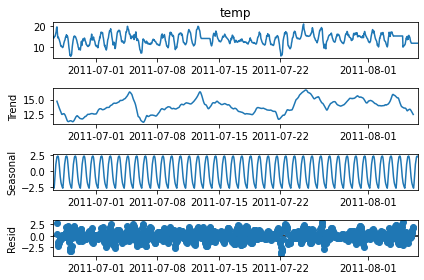

In [ ]:
results = seasonal_decompose(df['temp'].iloc[:1000]) # model = 'addictive'
results.plot();

### Time series Generator

https://machinelearningmastery.com/how-to-use-the-timeseriesgenerator-for-time-series-forecasting-in-keras/

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
# define generator
n_input = 24*7 #weekly
n_features = 4
generator = TimeseriesGenerator(df['temp'], df['temp'], length=n_input, batch_size= 4)

In [ ]:
X,y = generator[-1]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[]
Predict this y: 
 [13.5 11.9 10.9 11.9]


https://medium.com/@canerkilinc/selecting-optimal-lstm-batch-size-63066d88b96b

https://machinelearningmastery.com/how-to-control-the-speed-and-stability-of-training-neural-networks-with-gradient-descent-batch-size/

### Generate, split and scale data

In [8]:
# [[[1], [2], [3], [4], [5]]] -> [6]
# [[[2], [3], [4], [5], [6]]] -> [7]
# [[[3], [4], [5], [6], [7]]] -> [8]

def df_to_X_y(df, window_size=24*7):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

Note: In time series data, we should split data into train and validation, test before scale. Because if we scale first, we'll make a mistake called Data Leakage - features of test data will leak to train in scale and it's wrong. The point is we learn features from training data and predict test data that we don't know what feature it have.

So, instead of using fit_transform all data, we split data first then use the statistics from the train split to scale all the splits (validation and test).

## Forecasting with Univariate (Temp)

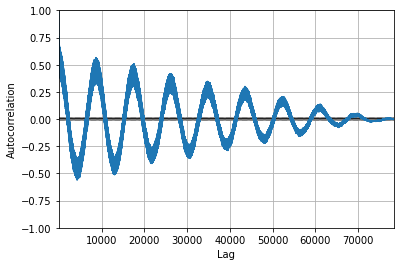

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['temp'])
plt.show()

In [9]:
# Predict next temperature based on temperature from couple previous days 
X1, y1 = df_to_X_y(df['temp'], window_size = 30) 
X1.shape, y1.shape

((78282, 30, 1), (78282,))

Fact: I try to scale X data from previous week or 5 days but it takes me more than a day to tuning hyperparameter and It didnt finish so I just take small sample 

In [10]:
#230000, 190000
X1_train, Y1_train = X1[:60000], y1[:60000]
X1_val, Y1_val = X1[60000:69000], y1[60000:69000]
X1_test, Y1_test = X1[69000:], y1[69000:]
X1_train.shape, Y1_train.shape, X1_val.shape, Y1_val.shape, X1_test.shape, Y1_test.shape

((60000, 30, 1), (60000,), (9000, 30, 1), (9000,), (9282, 30, 1), (9282,))

In [ ]:
Y1_train, Y1_test

(array([11. , 11.9, 12.5, ...,  6.5,  6.5,  6.8]),
 array([ 6.2,  9. , 10.2, ..., 16.1, 14.3, 13.5]))

In [11]:
from sklearn.preprocessing import StandardScaler
def Scale_data(train, validation, test):
  scaler = StandardScaler()
  scaler.fit(train.reshape(-1,1))

  scaled_train = scaler.transform(train.reshape(-1,1))
  scaled_train = scaled_train.reshape(*train.shape)

  scaled_val = scaler.transform(validation.reshape(-1,1))
  scaled_val = scaled_val.reshape(*validation.shape)

  scaled_test = scaler.transform(test.reshape(-1,1))
  scaled_test = scaled_test.reshape(*test.shape)

  return scaled_train, scaled_val, scaled_test, scaler

#Note: don't use fit_transform like this:  scaled_data_temp = scaler.fit_transform(temp.values.reshape(-1,1))

In [12]:
scaled_train_X, scaled_val_X, scaled_test_X, scaler_X = Scale_data(X1_train, X1_val, X1_test)

scaled_train_y, scaled_val_y, scaled_test_y, scaler_y = Scale_data(Y1_train, Y1_val, Y1_test)

In [ ]:
scaled_train_y, scaled_test_y

(array([ 0.26160072,  0.44855308,  0.573188  , ..., -0.67316112,
        -0.67316112, -0.61084367]),
 array([-0.73547858, -0.15384899,  0.09542083, ...,  1.32099747,
         0.94709273,  0.78091285]))

https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/

hidden layer: https://ai.stackexchange.com/questions/3156/how-to-select-number-of-hidden-layers-and-number-of-memory-cells-in-an-lstm

## Hyperparameter Tuning: Bayesian optimization

In [13]:
# Cài đặt keras_tuner
!pip install keras_tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 KB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 37.6 MB/s eta 0:00:00


In [14]:
import keras_tuner 
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [15]:
def model_builder(hyperparameter):
  model = Sequential()
  hp_unit = hyperparameter.Int('units1',min_value = 32, max_value = 256, step = 32)
  model.add(LSTM(hp_unit, input_shape = (30,1)))

  hp_dense = hyperparameter.Int('units2', min_value = 8, max_value = 32, step = 8)
  model.add(Dense(hp_dense,'relu'))
  model.add(Dense(1,'linear'))

  model.summary()

  # lr = hyperparameter.Choice("lr",values=[1e-2,1e-3,1e-4])
  model.compile(loss = MeanSquaredError(), optimizer = Adam(learning_rate = 1e-2), metrics = [RootMeanSquaredError()])
  
  return model

max_trials represents the number of hyperparameter combinations that will be tested by the tuner. In this situation I don't use max_trial cause I usually change range of hyperparameter

 execution_per_trial is the number of models that should be built and fit for each trial for robustness purposes.

In [16]:
tuner = keras_tuner.BayesianOptimization(model_builder, objective='val_loss', directory='my_dir', executions_per_trial=1)
# Keras Callbacks - Early Stop
# stop_early = keras.callbacks.EarlyStopping(monitor="val_loss", patience=20)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4352      
                                                                 
 dense (Dense)               (None, 8)                 264       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 4,625
Trainable params: 4,625
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Finding best set of hyperparameter
tuner.search(X1_train, Y1_train, validation_data = (X1_val, Y1_val), epochs = 10)

In [ ]:
#256 16
#loss 0.513
best_hps = tuner.get_best_hyperparameters()[0]
print(best_hps.values)

https://medium.com/geekculture/10-hyperparameters-to-keep-an-eye-on-for-your-lstm-model-and-other-tips-f0ff5b63fcd4

## Model

In [ ]:
best_model = tuner.get_best_models()[0]
best_model.build((X1_train.shape[1], X1_train.shape[2]))
best_model.summary()

history = best_model.fit(X1_train, Y1_train, validation_data=(X1_val, Y1_val), epochs=20)
best_model.save("/content/drive/MyDrive/Dataset/model.h5")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dense (Dense)               (None, 16)                4112      
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 268,321
Trainable params: 268,321
Non-trainable params: 0
_________________________________________________________________
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dense (Dense)               (

### LSTM

In [ ]:
# 256 as number of neuron in the first visible layer
# The input shape will be 30 time step with 1 features (label).
model1 = Sequential()
model1.add(LSTM(256, input_shape = (X1_train.shape[1], X1_train.shape[2])))
model1.add(Dense(16, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dense (Dense)               (None, 16)                4112      
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 268,321
Trainable params: 268,321
Non-trainable params: 0
_________________________________________________________________


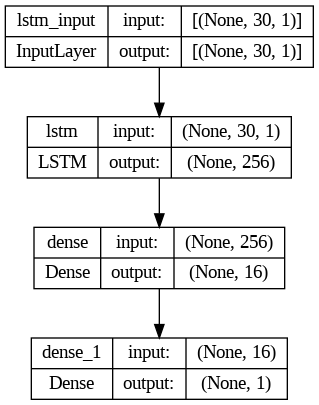

In [ ]:
tf.keras.utils.plot_model(
    model1,
    show_shapes=True,
    show_layer_names=True,
)

In [ ]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.01), metrics=[RootMeanSquaredError()])

In [ ]:
history1 = model1.fit(scaled_train_X, scaled_train_y, validation_data=(scaled_val_X, scaled_val_y), epochs=20, callbacks=[cp1])

Epoch 1/20
1875/1875 [==============================] - ETA: 0s - loss: 0.0311 - root_mean_squared_error: 0.1764

1875/1875 [==============================] - 292s 156ms/step - loss: 0.0311 - root_mean_squared_error: 0.1764 - val_loss: 0.0283 - val_root_mean_squared_error: 0.1682
Epoch 2/20
1875/1875 [==============================] - ETA: 0s - loss: 0.0272 - root_mean_squared_error: 0.1648

1875/1875 [==============================] - 212s 113ms/step - loss: 0.0272 - root_mean_squared_error: 0.1648 - val_loss: 0.0261 - val_root_mean_squared_error: 0.1616
Epoch 3/20
1875/1875 [==============================] - ETA: 0s - loss: 0.0260 - root_mean_squared_error: 0.1612

1875/1875 [==============================] - 204s 109ms/step - loss: 0.0260 - root_mean_squared_error: 0.1612 - val_loss: 0.0245 - val_root_mean_squared_error: 0.1564
Epoch 4/20
1875/1875 [==============================] - 194s 104ms/step - loss: 0.0250 - root_mean_squared_error: 0.1582 - val_loss: 0.0277 - val_root_mean_squared_error: 0.1663
Epoch 5/20
1875/1875 [==============================] - 201s 107ms/step - loss: 0.0247 - root_mean_squared_error: 0.1573 - val_loss: 0.0315 - val_root_mean_squared_error: 0.1775
Epoch 6/20
1875/1875 [==============================] - ETA: 0s - loss: 0.0240 - root_mean_squared_error: 0.1550

1875/1875 [==============================] - 201s 107ms/step - loss: 0.0240 - root_mean_squared_error: 0.1550 - val_loss: 0.0231 - val_root_mean_squared_error: 0.1520
Epoch 7/20
1875/1875 [==============================] - ETA: 0s - loss: 0.0237 - root_mean_squared_error: 0.1539

1875/1875 [==============================] - 210s 112ms/step - loss: 0.0237 - root_mean_squared_error: 0.1539 - val_loss: 0.0231 - val_root_mean_squared_error: 0.1519
Epoch 8/20
1875/1875 [==============================] - 196s 104ms/step - loss: 0.0235 - root_mean_squared_error: 0.1532 - val_loss: 0.0263 - val_root_mean_squared_error: 0.1621
Epoch 9/20
1875/1875 [==============================] - 197s 105ms/step - loss: 0.0232 - root_mean_squared_error: 0.1523 - val_loss: 0.0243 - val_root_mean_squared_error: 0.1557
Epoch 10/20
1875/1875 [==============================] - ETA: 0s - loss: 0.0230 - root_mean_squared_error: 0.1517

1875/1875 [==============================] - 203s 108ms/step - loss: 0.0230 - root_mean_squared_error: 0.1517 - val_loss: 0.0229 - val_root_mean_squared_error: 0.1513
Epoch 11/20
1875/1875 [==============================] - ETA: 0s - loss: 0.0227 - root_mean_squared_error: 0.1507

1875/1875 [==============================] - 206s 110ms/step - loss: 0.0227 - root_mean_squared_error: 0.1507 - val_loss: 0.0226 - val_root_mean_squared_error: 0.1502
Epoch 12/20
1875/1875 [==============================] - 196s 104ms/step - loss: 0.0227 - root_mean_squared_error: 0.1507 - val_loss: 0.0238 - val_root_mean_squared_error: 0.1542
Epoch 13/20
1875/1875 [==============================] - 197s 105ms/step - loss: 0.0224 - root_mean_squared_error: 0.1497 - val_loss: 0.0239 - val_root_mean_squared_error: 0.1546
Epoch 14/20
1875/1875 [==============================] - 197s 105ms/step - loss: 0.0224 - root_mean_squared_error: 0.1497 - val_loss: 0.0232 - val_root_mean_squared_error: 0.1524
Epoch 15/20
1875/1875 [==============================] - ETA: 0s - loss: 0.0222 - root_mean_squared_error: 0.1490

1875/1875 [==============================] - 202s 108ms/step - loss: 0.0222 - root_mean_squared_error: 0.1490 - val_loss: 0.0222 - val_root_mean_squared_error: 0.1489
Epoch 16/20
1875/1875 [==============================] - 196s 105ms/step - loss: 0.0222 - root_mean_squared_error: 0.1489 - val_loss: 0.0245 - val_root_mean_squared_error: 0.1565
Epoch 17/20
1875/1875 [==============================] - 199s 106ms/step - loss: 0.0305 - root_mean_squared_error: 0.1747 - val_loss: 0.0400 - val_root_mean_squared_error: 0.1999
Epoch 18/20
1875/1875 [==============================] - 199s 106ms/step - loss: 0.0337 - root_mean_squared_error: 0.1836 - val_loss: 0.0296 - val_root_mean_squared_error: 0.1720
Epoch 19/20
1875/1875 [==============================] - 197s 105ms/step - loss: 0.0287 - root_mean_squared_error: 0.1693 - val_loss: 0.0364 - val_root_mean_squared_error: 0.1908
Epoch 20/20
1875/1875 [==============================] - 196s 104ms/step - loss: 0.0391 - root_mean_squared_error: 0.

In [ ]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

## Evaluate model

In [16]:
def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end], label = 'Predictions')
  plt.plot(df['Actuals'][start:end], label = 'Acutals')
  plt.xlabel('Time sequence (Hour)')
  plt.ylabel('Label values')
  plt.legend(['Prediction','Actuals'])
  plt.show()
  return df, mse(y, predictions), r2_score(y, predictions)

def plot_predictions_scaled(model, scaler_X, X_scaled, scaler_y, y_scaled, start = 0, end = 100):
  predictions = model.predict(X_scaled).flatten()
  y_scaled = scaler_y.inverse_transform(y_scaled.reshape((-1,1)))
  predictions = scaler_y.inverse_transform(predictions.reshape((-1,1)))
  # df = pd.DataFrame({'Predictions':predictions.reshape(-1), 'Actuals':y_scaled.reshape(-1)},index=[0])
  plt.plot(predictions[start:end], label = 'Predictions')
  plt.plot(y_scaled[start:end], label = 'Actuals')
  plt.xlabel('Time sequence')
  plt.ylabel('Label values')
  plt.legend(['Prediction','Actuals'])
  plt.show()
  print('Mean Squared Error =',mse(y_scaled, predictions))
  print('R2 score =',r2_score(y_scaled, predictions))
  print('Predictions    Actuals')
  for i, (a, b) in enumerate(zip(predictions, y_scaled)):
    if i>10: 
      break
    print(i, a, b)

291/291 [==============================] - 11s 38ms/step


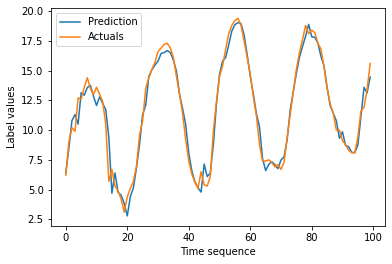

Mean Squared Error = 0.5133089498420793
R2 score = 0.9785252087726648
Predictions    Actuals
0 [6.377226] [6.2]
1 [8.491744] [9.]
2 [10.798792] [10.2]
3 [11.305255] [9.9]
4 [10.504961] [12.7]
5 [13.140624] [12.6]
6 [12.930391] [13.6]
7 [13.573864] [14.4]
8 [13.772749] [13.5]
9 [12.85697] [13.]
10 [12.066614] [13.6]


In [ ]:
plot_predictions_scaled(model1, scaler_X, scaled_test_X, scaler_y, scaled_test_y,0,100)

## Experiment Generator more sample to predict future

In [ ]:
from datetime import datetime

current_dateTime = datetime.now()
current_dateTime

In [ ]:
df.index[-1]

Timestamp('2020-06-01 00:00:00', freq='H')

In [ ]:
current_dateTime

datetime.datetime(2023, 2, 10, 15, 31, 18, 119990)

In [ ]:
def Predict_future(model, X, Y, time_predict, time_current, window_size = 24):
  #generate sample
  row = X_test1[-1].reshape(1,X_test1.shape[1],1)
  sample_x = row
  sample_y = []
  # timing =int((current_dateTime - df.index[-1]).total_seconds()/3600)
  timing = 2160 #3 month
  for i in range(timing):
    value_predict = model.predict(row).flatten()
    sample_y = np.concatenate((sample_y, value_predict), axis = 0)
    row = row[:,1:]
    row = np.concatenate((row, value_predict.reshape(1,1,1)), axis = 1)
    sample_x = np.concatenate((sample_x, row), axis = 0)
      # results = pd.DataFrame(data={'Predictions':value_predict, 'Actuals':Y})
      # results[:50].plot()
  last_value_sample = model.predict(row).flatten()
  sample_y = np.concatenate((sample_y, last_value_sample), axis = 0)
  sample_y = sample_y.reshape(1, sample_y.shape[0], 1) #(1,1,1)

  return np.array(sample_x), np.array(sample_y)

In [ ]:
features_sample_predict, label_sample_predict = Predict_future(model1, X_test1, test_predictions,
                                                                current_dateTime, df.index[-1], window_size = 24*7)

1/1 [==============================] - 0s 28ms/step


In [ ]:
features_sample_predict.shape, label_sample_predict.shape

((2161, 168, 1), (1, 2161, 1), 22852)

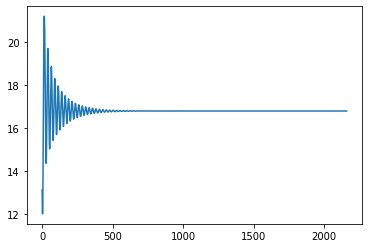

In [ ]:
plt.plot(label_sample_predict.reshape(label_sample_predict.shape[1],label_sample_predict.shape[2]))

## CNN 1D Experiment

In [21]:
model2 = Sequential()
model2.add(InputLayer((30, 1)))
model2.add(Conv1D(256, kernel_size=2))
model2.add(Flatten())
model2.add(Dense(16, 'relu'))
model2.add(Dense(1, 'linear'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 29, 256)           768       
                                                                 
 flatten (Flatten)           (None, 7424)              0         
                                                                 
 dense_2 (Dense)             (None, 16)                118800    
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 119,585
Trainable params: 119,585
Non-trainable params: 0
_________________________________________________________________


In [22]:
cp2 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [23]:
history2 = model2.fit(scaled_train_X, scaled_train_y, validation_data=(scaled_val_X, scaled_val_y), epochs=20, callbacks=[cp2])

Epoch 1/20
1869/1875 [============================>.] - ETA: 0s - loss: 0.0399 - root_mean_squared_error: 0.1997

1875/1875 [==============================] - 17s 8ms/step - loss: 0.0398 - root_mean_squared_error: 0.1996 - val_loss: 0.0248 - val_root_mean_squared_error: 0.1576
Epoch 2/20
1873/1875 [============================>.] - ETA: 0s - loss: 0.0244 - root_mean_squared_error: 0.1562

1875/1875 [==============================] - 17s 9ms/step - loss: 0.0244 - root_mean_squared_error: 0.1561 - val_loss: 0.0240 - val_root_mean_squared_error: 0.1548
Epoch 3/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0240 - root_mean_squared_error: 0.1549 - val_loss: 0.0257 - val_root_mean_squared_error: 0.1604
Epoch 4/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0235 - root_mean_squared_error: 0.1532 - val_loss: 0.0242 - val_root_mean_squared_error: 0.1555
Epoch 5/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0235 - root_mean_squared_error: 0.1532 - val_loss: 0.0247 - val_root_mean_squared_error: 0.1573
Epoch 6/20
1874/1875 [============================>.] - ETA: 0s - loss: 0.0233 - root_mean_squared_error: 0.1525

1875/1875 [==============================] - 18s 10ms/step - loss: 0.0233 - root_mean_squared_error: 0.1525 - val_loss: 0.0234 - val_root_mean_squared_error: 0.1530
Epoch 7/20
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0230 - root_mean_squared_error: 0.1518 - val_loss: 0.0235 - val_root_mean_squared_error: 0.1532
Epoch 8/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0229 - root_mean_squared_error: 0.1513 - val_loss: 0.0241 - val_root_mean_squared_error: 0.1554
Epoch 9/20
1872/1875 [============================>.] - ETA: 0s - loss: 0.0228 - root_mean_squared_error: 0.1509

1875/1875 [==============================] - 16s 9ms/step - loss: 0.0228 - root_mean_squared_error: 0.1508 - val_loss: 0.0231 - val_root_mean_squared_error: 0.1520
Epoch 10/20
1867/1875 [============================>.] - ETA: 0s - loss: 0.0226 - root_mean_squared_error: 0.1505

1875/1875 [==============================] - 18s 9ms/step - loss: 0.0226 - root_mean_squared_error: 0.1505 - val_loss: 0.0229 - val_root_mean_squared_error: 0.1514
Epoch 11/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0226 - root_mean_squared_error: 0.1503 - val_loss: 0.0250 - val_root_mean_squared_error: 0.1580
Epoch 12/20
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0225 - root_mean_squared_error: 0.1500 - val_loss: 0.0234 - val_root_mean_squared_error: 0.1531
Epoch 13/20
1871/1875 [============================>.] - ETA: 0s - loss: 0.0225 - root_mean_squared_error: 0.1499

1875/1875 [==============================] - 16s 9ms/step - loss: 0.0225 - root_mean_squared_error: 0.1499 - val_loss: 0.0229 - val_root_mean_squared_error: 0.1512
Epoch 14/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0223 - root_mean_squared_error: 0.1495 - val_loss: 0.0229 - val_root_mean_squared_error: 0.1515
Epoch 15/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0223 - root_mean_squared_error: 0.1495 - val_loss: 0.0236 - val_root_mean_squared_error: 0.1536
Epoch 16/20
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0223 - root_mean_squared_error: 0.1492 - val_loss: 0.0236 - val_root_mean_squared_error: 0.1537
Epoch 17/20
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0222 - root_mean_squared_error: 0.1491 - val_loss: 0.0245 - val_root_mean_squared_error: 0.1564
Epoch 18/20
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0221 - root_mean_squared_error: 0.1488 - val_loss: 

1875/1875 [==============================] - 17s 9ms/step - loss: 0.0221 - root_mean_squared_error: 0.1486 - val_loss: 0.0227 - val_root_mean_squared_error: 0.1507


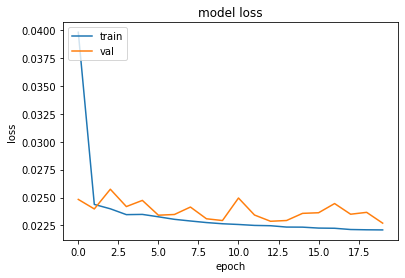

In [25]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper left')
plt.show()

## GRU

In [15]:
model3 = Sequential()
model3.add(InputLayer((30, 1)))
model3.add(GRU(256))
model3.add(Dense(16, 'relu'))
model3.add(Dense(1, 'linear'))
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 256)               198912    
                                                                 
 dense (Dense)               (None, 16)                4112      
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 203,041
Trainable params: 203,041
Non-trainable params: 0
_________________________________________________________________


In [16]:
cp3 = ModelCheckpoint('model3/', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [17]:
model3.fit(scaled_train_X, scaled_train_y, validation_data=(scaled_val_X, scaled_val_y), epochs=20, callbacks=[cp3])

Epoch 1/20
1875/1875 [==============================] - ETA: 0s - loss: 0.0711 - root_mean_squared_error: 0.2666

1875/1875 [==============================] - 189s 99ms/step - loss: 0.0711 - root_mean_squared_error: 0.2666 - val_loss: 0.0276 - val_root_mean_squared_error: 0.1662
Epoch 2/20
1875/1875 [==============================] - ETA: 0s - loss: 0.0253 - root_mean_squared_error: 0.1590

1875/1875 [==============================] - 191s 102ms/step - loss: 0.0253 - root_mean_squared_error: 0.1590 - val_loss: 0.0249 - val_root_mean_squared_error: 0.1578
Epoch 3/20
1875/1875 [==============================] - 186s 99ms/step - loss: 0.0246 - root_mean_squared_error: 0.1568 - val_loss: 0.0272 - val_root_mean_squared_error: 0.1650
Epoch 4/20
1875/1875 [==============================] - ETA: 0s - loss: 0.0240 - root_mean_squared_error: 0.1549

1875/1875 [==============================] - 181s 96ms/step - loss: 0.0240 - root_mean_squared_error: 0.1549 - val_loss: 0.0235 - val_root_mean_squared_error: 0.1534
Epoch 5/20
1875/1875 [==============================] - ETA: 0s - loss: 0.0236 - root_mean_squared_error: 0.1535

1875/1875 [==============================] - 184s 98ms/step - loss: 0.0236 - root_mean_squared_error: 0.1535 - val_loss: 0.0234 - val_root_mean_squared_error: 0.1531
Epoch 6/20
1875/1875 [==============================] - ETA: 0s - loss: 0.0231 - root_mean_squared_error: 0.1521

1875/1875 [==============================] - 187s 100ms/step - loss: 0.0231 - root_mean_squared_error: 0.1521 - val_loss: 0.0232 - val_root_mean_squared_error: 0.1523
Epoch 7/20
1875/1875 [==============================] - 182s 97ms/step - loss: 0.0229 - root_mean_squared_error: 0.1512 - val_loss: 0.0244 - val_root_mean_squared_error: 0.1562
Epoch 8/20
1875/1875 [==============================] - ETA: 0s - loss: 0.0227 - root_mean_squared_error: 0.1505

1875/1875 [==============================] - 191s 102ms/step - loss: 0.0227 - root_mean_squared_error: 0.1505 - val_loss: 0.0231 - val_root_mean_squared_error: 0.1519
Epoch 9/20
1875/1875 [==============================] - ETA: 0s - loss: 0.0225 - root_mean_squared_error: 0.1500

1875/1875 [==============================] - 188s 100ms/step - loss: 0.0225 - root_mean_squared_error: 0.1500 - val_loss: 0.0223 - val_root_mean_squared_error: 0.1494
Epoch 10/20
1875/1875 [==============================] - 187s 100ms/step - loss: 0.0223 - root_mean_squared_error: 0.1492 - val_loss: 0.0236 - val_root_mean_squared_error: 0.1535
Epoch 11/20
1875/1875 [==============================] - 184s 98ms/step - loss: 0.0222 - root_mean_squared_error: 0.1491 - val_loss: 0.0227 - val_root_mean_squared_error: 0.1507
Epoch 12/20
1875/1875 [==============================] - ETA: 0s - loss: 0.0221 - root_mean_squared_error: 0.1486

1875/1875 [==============================] - 190s 101ms/step - loss: 0.0221 - root_mean_squared_error: 0.1486 - val_loss: 0.0222 - val_root_mean_squared_error: 0.1491
Epoch 13/20
1875/1875 [==============================] - ETA: 0s - loss: 0.0220 - root_mean_squared_error: 0.1484

1875/1875 [==============================] - 188s 100ms/step - loss: 0.0220 - root_mean_squared_error: 0.1484 - val_loss: 0.0222 - val_root_mean_squared_error: 0.1491
Epoch 14/20
1875/1875 [==============================] - 182s 97ms/step - loss: 0.0220 - root_mean_squared_error: 0.1482 - val_loss: 0.0227 - val_root_mean_squared_error: 0.1506
Epoch 15/20
1875/1875 [==============================] - 185s 99ms/step - loss: 0.0219 - root_mean_squared_error: 0.1479 - val_loss: 0.0225 - val_root_mean_squared_error: 0.1499
Epoch 16/20
1875/1875 [==============================] - ETA: 0s - loss: 0.0219 - root_mean_squared_error: 0.1479

1875/1875 [==============================] - 189s 101ms/step - loss: 0.0219 - root_mean_squared_error: 0.1479 - val_loss: 0.0221 - val_root_mean_squared_error: 0.1487
Epoch 17/20
1875/1875 [==============================] - 174s 93ms/step - loss: 0.0218 - root_mean_squared_error: 0.1475 - val_loss: 0.0229 - val_root_mean_squared_error: 0.1512
Epoch 18/20
1875/1875 [==============================] - ETA: 0s - loss: 0.0218 - root_mean_squared_error: 0.1475

1875/1875 [==============================] - 190s 101ms/step - loss: 0.0218 - root_mean_squared_error: 0.1475 - val_loss: 0.0221 - val_root_mean_squared_error: 0.1486
Epoch 19/20
1875/1875 [==============================] - 186s 99ms/step - loss: 0.0216 - root_mean_squared_error: 0.1471 - val_loss: 0.0221 - val_root_mean_squared_error: 0.1488
Epoch 20/20
1875/1875 [==============================] - 180s 96ms/step - loss: 0.0217 - root_mean_squared_error: 0.1473 - val_loss: 0.0223 - val_root_mean_squared_error: 0.1494


291/291 [==============================] - 11s 35ms/step


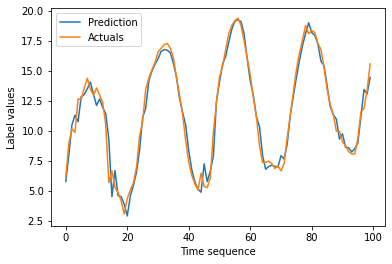

Mean Squared Error = 0.5151385132828282
R2 score = 0.97844866716368
Predictions    Actuals
0 [5.815942] [6.2]
1 [8.019852] [9.]
2 [10.5320215] [10.2]
3 [11.328409] [9.9]
4 [10.789416] [12.7]
5 [12.870396] [12.6]
6 [13.043643] [13.6]
7 [13.530739] [14.4]
8 [14.088174] [13.5]
9 [13.08539] [13.]
10 [12.137156] [13.6]


In [20]:
plot_predictions_scaled(model3, scaler_X, scaled_test_X, scaler_y, scaled_test_y,0,100)

## Transformer

In [17]:
from tensorflow import keras
from tensorflow.keras import layers

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

In [18]:
def transformer_model(input_shape, head_size, num_heads, ff_dim, num_transformer_blocks, mlp_units, dropout=0, mlp_dropout=0):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(1)(x)
    return keras.Model(inputs, outputs)

In [19]:
input_shape = scaled_train_X.shape[1:]

model = transformer_model(
    input_shape,
    head_size=128,
    num_heads=4,
    ff_dim=4,
    num_transformer_blocks=4,
    mlp_units=[128],
    mlp_dropout=0.4,
    dropout=0.25,
)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 30, 1)]      0           []                               
                                                                                                  
 layer_normalization (LayerNorm  (None, 30, 1)       2           ['input_1[0][0]']                
 alization)                                                                                       
                                                                                                  
 multi_head_attention (MultiHea  (None, 30, 1)       3585        ['layer_normalization[0][0]',    
 dAttention)                                                      'layer_normalization[0][0]']    
                                                                                              

In [20]:
cp = ModelCheckpoint('model/', save_best_only=True)

model.compile(loss = 'mean_squared_error', optimizer = keras.optimizers.Adam(learning_rate = 0.0001), metrics = [RootMeanSquaredError()])

In [22]:
history_transformer = model.fit(scaled_train_X, scaled_train_y, validation_data=(scaled_val_X, scaled_val_y), epochs=20, callbacks=[cp])

Epoch 1/20
1875/1875 [==============================] - ETA: 0s - loss: 0.2187 - root_mean_squared_error: 0.4677

1875/1875 [==============================] - 296s 158ms/step - loss: 0.2187 - root_mean_squared_error: 0.4677 - val_loss: 0.0536 - val_root_mean_squared_error: 0.2315
Epoch 2/20
1875/1875 [==============================] - ETA: 0s - loss: 0.0827 - root_mean_squared_error: 0.2877

1875/1875 [==============================] - 282s 150ms/step - loss: 0.0827 - root_mean_squared_error: 0.2877 - val_loss: 0.0394 - val_root_mean_squared_error: 0.1985
Epoch 3/20
1875/1875 [==============================] - ETA: 0s - loss: 0.0588 - root_mean_squared_error: 0.2425

1875/1875 [==============================] - 287s 153ms/step - loss: 0.0588 - root_mean_squared_error: 0.2425 - val_loss: 0.0328 - val_root_mean_squared_error: 0.1812
Epoch 4/20
1875/1875 [==============================] - ETA: 0s - loss: 0.0492 - root_mean_squared_error: 0.2218

1875/1875 [==============================] - 289s 154ms/step - loss: 0.0492 - root_mean_squared_error: 0.2218 - val_loss: 0.0291 - val_root_mean_squared_error: 0.1707
Epoch 5/20
1875/1875 [==============================] - ETA: 0s - loss: 0.0444 - root_mean_squared_error: 0.2107

1875/1875 [==============================] - 281s 150ms/step - loss: 0.0444 - root_mean_squared_error: 0.2107 - val_loss: 0.0273 - val_root_mean_squared_error: 0.1651
Epoch 6/20
1875/1875 [==============================] - ETA: 0s - loss: 0.0417 - root_mean_squared_error: 0.2042

1875/1875 [==============================] - 277s 148ms/step - loss: 0.0417 - root_mean_squared_error: 0.2042 - val_loss: 0.0264 - val_root_mean_squared_error: 0.1626
Epoch 7/20
1875/1875 [==============================] - ETA: 0s - loss: 0.0400 - root_mean_squared_error: 0.2000

1875/1875 [==============================] - 276s 147ms/step - loss: 0.0400 - root_mean_squared_error: 0.2000 - val_loss: 0.0257 - val_root_mean_squared_error: 0.1602
Epoch 8/20
1875/1875 [==============================] - ETA: 0s - loss: 0.0385 - root_mean_squared_error: 0.1962

1875/1875 [==============================] - 275s 147ms/step - loss: 0.0385 - root_mean_squared_error: 0.1962 - val_loss: 0.0254 - val_root_mean_squared_error: 0.1593
Epoch 9/20
1875/1875 [==============================] - ETA: 0s - loss: 0.0376 - root_mean_squared_error: 0.1940

1875/1875 [==============================] - 277s 148ms/step - loss: 0.0376 - root_mean_squared_error: 0.1940 - val_loss: 0.0251 - val_root_mean_squared_error: 0.1584
Epoch 10/20
1875/1875 [==============================] - ETA: 0s - loss: 0.0370 - root_mean_squared_error: 0.1923

1875/1875 [==============================] - 268s 143ms/step - loss: 0.0370 - root_mean_squared_error: 0.1923 - val_loss: 0.0244 - val_root_mean_squared_error: 0.1563
Epoch 11/20
1875/1875 [==============================] - 269s 144ms/step - loss: 0.0368 - root_mean_squared_error: 0.1919 - val_loss: 0.0247 - val_root_mean_squared_error: 0.1570
Epoch 12/20
1875/1875 [==============================] - ETA: 0s - loss: 0.0366 - root_mean_squared_error: 0.1913

1875/1875 [==============================] - 275s 147ms/step - loss: 0.0366 - root_mean_squared_error: 0.1913 - val_loss: 0.0241 - val_root_mean_squared_error: 0.1551
Epoch 13/20
1875/1875 [==============================] - 268s 143ms/step - loss: 0.0361 - root_mean_squared_error: 0.1900 - val_loss: 0.0241 - val_root_mean_squared_error: 0.1552
Epoch 14/20
1875/1875 [==============================] - 271s 144ms/step - loss: 0.0360 - root_mean_squared_error: 0.1898 - val_loss: 0.0246 - val_root_mean_squared_error: 0.1568
Epoch 15/20
1875/1875 [==============================] - ETA: 0s - loss: 0.0355 - root_mean_squared_error: 0.1885

1875/1875 [==============================] - 278s 149ms/step - loss: 0.0355 - root_mean_squared_error: 0.1885 - val_loss: 0.0238 - val_root_mean_squared_error: 0.1541
Epoch 16/20
1875/1875 [==============================] - 270s 144ms/step - loss: 0.0354 - root_mean_squared_error: 0.1882 - val_loss: 0.0239 - val_root_mean_squared_error: 0.1545
Epoch 17/20
1875/1875 [==============================] - ETA: 0s - loss: 0.0352 - root_mean_squared_error: 0.1876

1875/1875 [==============================] - 274s 146ms/step - loss: 0.0352 - root_mean_squared_error: 0.1876 - val_loss: 0.0235 - val_root_mean_squared_error: 0.1534
Epoch 18/20
1875/1875 [==============================] - 265s 141ms/step - loss: 0.0351 - root_mean_squared_error: 0.1873 - val_loss: 0.0237 - val_root_mean_squared_error: 0.1539
Epoch 19/20
1875/1875 [==============================] - 257s 137ms/step - loss: 0.0345 - root_mean_squared_error: 0.1858 - val_loss: 0.0236 - val_root_mean_squared_error: 0.1536
Epoch 20/20
1875/1875 [==============================] - 262s 140ms/step - loss: 0.0349 - root_mean_squared_error: 0.1868 - val_loss: 0.0244 - val_root_mean_squared_error: 0.1561


In [ ]:
from tensorflow.keras.models import load_model
model_temp = load_model('model/')

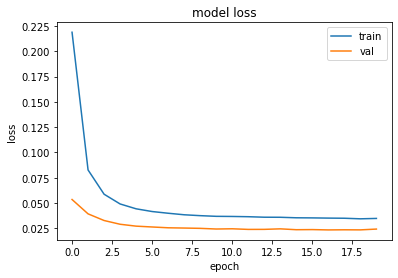

In [27]:
plt.plot(history_transformer.history['loss'])
plt.plot(history_transformer.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'])
plt.show()

291/291 [==============================] - 21s 72ms/step


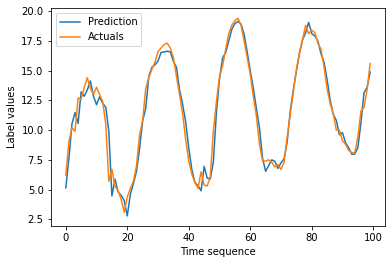

Mean Squared Error = 0.5628105275729818
R2 score = 0.9764542609594192
Predictions    Actuals
0 [5.146511] [6.2]
1 [7.589394] [9.]
2 [10.519896] [10.2]
3 [11.465561] [9.9]
4 [10.566531] [12.7]
5 [13.210041] [12.6]
6 [12.847023] [13.6]
7 [13.382394] [14.4]
8 [14.128582] [13.5]
9 [12.8560295] [13.]
10 [12.132155] [13.6]


In [23]:
plot_predictions_scaled(model, scaler_X, scaled_test_X, scaler_y, scaled_test_y,0,100)

## LSTM multivariable (multi-feature)

### From multivariable -> predict univariable

In [ ]:
correlation = df.iloc[:,5:13].corr()
correlation.style.background_gradient(cmap = 'BrBG')

,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir
temp,1.000000,0.974484,0.879340,0.865951,-0.382160,0.087516,0.151486,0.061597
wetb,0.974484,1.000000,0.962411,0.949528,-0.174071,0.059402,0.121287,0.062111
dewpt,0.879340,0.962411,1.000000,0.987531,0.094197,0.022926,0.061537,0.055073
vappr,0.865951,0.949528,0.987531,1.000000,0.099181,0.027071,0.050529,0.042688
rhum,-0.382160,-0.174071,0.094197,0.099181,1.000000,-0.131723,-0.234306,-0.041525
msl,0.087516,0.059402,0.022926,0.027071,-0.131723,1.000000,-0.315676,-0.012634
wdsp,0.151486,0.121287,0.061537,0.050529,-0.234306,-0.315676,1.000000,0.142940
wddir,0.061597,0.062111,0.055073,0.042688,-0.041525,-0.012634,0.142940,1.000000


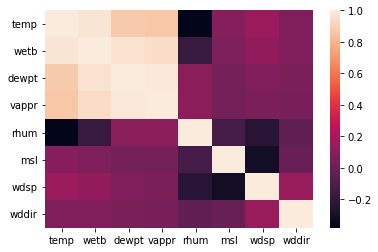

In [ ]:
import seaborn  
correlation = df.iloc[:,5:13].corr()  
seaborn.heatmap(correlation)  

Because the first 4 features has correlate to each other so I group them 

In [ ]:
df_multi = df.iloc[:,5:9]
df_multi

,temp,wetb,dewpt,vappr
date,,,,
2011-06-26 01:00:00,15.3,14.5,13.9,15.8
2011-06-26 02:00:00,14.7,13.7,12.9,14.9
2011-06-26 03:00:00,14.3,13.4,12.6,14.6
2011-06-26 04:00:00,14.4,13.6,12.8,14.8
2011-06-26 05:00:00,14.4,13.5,12.7,14.7
...,...,...,...,...
2020-05-31 20:00:00,20.4,14.7,9.9,12.2
2020-05-31 21:00:00,18.1,13.6,9.6,12.0
2020-05-31 22:00:00,16.1,12.5,9.3,11.7


In [ ]:
def df_to_X_y2(df, window_size=24*7):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size,1:]]
    X.append(row)
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
df_multi.to_numpy()

array([[15.3, 14.5, 13.9, 15.8],
       [14.7, 13.7, 12.9, 14.9],
       [14.3, 13.4, 12.6, 14.6],
       ...,
       [16.1, 12.5,  9.3, 11.7],
       [14.3, 11.6,  9. , 11.5],
       [13.5, 11. ,  8.6, 11.2]])

In [ ]:
X2, y2 = df_to_X_y2(df_multi, 30)
X2.shape, y2.shape

((78282, 30, 3), (78282,))

In [ ]:
X2_train, y2_train = X2[:60000], y2[:60000]
X2_val, y2_val = X2[60000:69000], y2[60000:69000]
X2_test, y2_test = X2[69000:], y2[69000:]
X2_train.shape, y2_train.shape, X2_val.shape, y2_val.shape, X2_test.shape, y2_test.shape

((60000, 30, 3), (60000,), (9000, 30, 3), (9000,), (9282, 30, 3), (9282,))

In [ ]:
# temp_training_mean = np.mean(X2_train[:, :, 0])
# temp_training_std = np.std(X2_train[:, :, 0])
                           
# def preprocess(X):
#   X[:, :, 0] = (X[:, :, 0] - temp_training_mean) / temp_training_std
#   return X

# preprocess(X2_train)
# preprocess(X2_val)
# preprocess(X2_test)

In [ ]:
scaled_train_X, scaled_val_X, scaled_test_X, scaler_X = Scale_data(X2_train, X2_val, X2_test)

scaled_train_y, scaled_val_y, scaled_test_y, scaler_y = Scale_data(y2_train, y2_val, y2_test)

In [ ]:
model4 = Sequential()
model4.add(InputLayer((30, 3)))
model4.add(LSTM(256))
model4.add(Dense(16, 'relu'))
model4.add(Dense(1, 'linear'))

model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               266240    
                                                                 
 dense (Dense)               (None, 16)                4112      
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 270,369
Trainable params: 270,369
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cp4 = ModelCheckpoint('model4/', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
history4 = model4.fit(scaled_train_X, scaled_train_y, validation_data=(scaled_val_X, scaled_val_y), epochs=20, callbacks=[cp4])

291/291 [==============================] - 15s 51ms/step


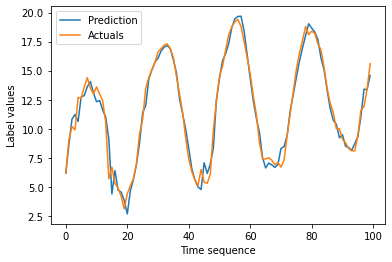

Mean Squared Error = 0.504081594841065
R2 score = 0.9789112443605662
Predictions    Actuals
0 [6.1695213] [6.2]
1 [8.6024275] [9.]
2 [10.816417] [10.2]
3 [11.232084] [9.9]
4 [10.627018] [12.7]
5 [12.746688] [12.6]
6 [12.845366] [13.6]
7 [13.623481] [14.4]
8 [14.068141] [13.5]
9 [13.086236] [13.]
10 [12.320235] [13.6]


In [ ]:
plot_predictions_scaled(model4, scaler_X, scaled_test_X, scaler_y, scaled_test_y,0,100)

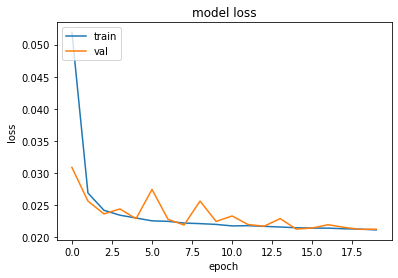

In [ ]:
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### From multivariable -> Predict multivariable

In [ ]:
def df_to_X_y3(df, window_size=24*7):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = [df_as_np[i+window_size][0], df_as_np[i+window_size][1]]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
X3, y3 = df_to_X_y3(df_multi, window_size = 30)
X3.shape, y3.shape

((78282, 30, 4), (78282, 2))

In [ ]:
X3_train, y3_train = X3[:60000], y3[:60000]
X3_val, y3_val = X3[60000:69000], y3[60000:69000]
X3_test, y3_test = X3[69000:], y3[69000:]
X3_train.shape, y3_train.shape, X3_val.shape, y3_val.shape, X3_test.shape, y3_test.shape

((60000, 30, 4),
 (60000, 2),
 (9000, 30, 4),
 (9000, 2),
 (9282, 30, 4),
 (9282, 2))

In [ ]:
# p_training_mean3 = np.mean(X3_train[:, :, 0])
# p_training_std3 = np.std(X3_train[:, :, 0])

# temp_training_mean3 = np.mean(X3_train[:, :, 1])
# temp_training_std3 = np.std(X3_train[:, :, 1])

# def preprocess3(X):
#   X[:, :, 0] = (X[:, :, 0] - p_training_mean3) / p_training_std3
#   X[:, :, 1] = (X[:, :, 1] - temp_training_mean3) / temp_training_std3

# def preprocess_output3(y):
#   y[:, 0] = (y[:, 0] - p_training_mean3) / p_training_std3
#   y[:, 1] = (y[:, 1] - temp_training_mean3) / temp_training_std3
#   return y

# preprocess3(X3_train)
# preprocess3(X3_val)
# preprocess3(X3_test)

# preprocess_output3(y3_train)
# preprocess_output3(y3_val)
# preprocess_output3(y3_test)

In [ ]:
scaled_train_X, scaled_val_X, scaled_test_X, scaler_X = Scale_data(X3_train, X3_val, X3_test)

scaled_train_y, scaled_val_y, scaled_test_y, scaler_y = Scale_data(y3_train, y3_val, y3_test)

In [ ]:
model5 = Sequential()
model5.add(InputLayer((30, 4)))
model5.add(LSTM(256))
model5.add(Dense(16, 'relu'))
model5.add(Dense(2, 'linear'))

model5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               267264    
                                                                 
 dense (Dense)               (None, 16)                4112      
                                                                 
 dense_1 (Dense)             (None, 2)                 34        
                                                                 
Total params: 271,410
Trainable params: 271,410
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cp5 = ModelCheckpoint('model5/', save_best_only=True)
model5.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
history5 = model5.fit(scaled_train_X, scaled_train_y, validation_data=(scaled_val_X, scaled_val_y), epochs=20, callbacks=[cp5])

Epoch 1/20
1875/1875 [==============================] - ETA: 0s - loss: 0.0654 - root_mean_squared_error: 0.2558

1875/1875 [==============================] - 224s 118ms/step - loss: 0.0654 - root_mean_squared_error: 0.2558 - val_loss: 0.0263 - val_root_mean_squared_error: 0.1623
Epoch 2/20
1875/1875 [==============================] - ETA: 0s - loss: 0.0212 - root_mean_squared_error: 0.1455

1875/1875 [==============================] - 199s 106ms/step - loss: 0.0212 - root_mean_squared_error: 0.1455 - val_loss: 0.0202 - val_root_mean_squared_error: 0.1421
Epoch 3/20
1875/1875 [==============================] - ETA: 0s - loss: 0.0202 - root_mean_squared_error: 0.1421

1875/1875 [==============================] - 195s 104ms/step - loss: 0.0202 - root_mean_squared_error: 0.1421 - val_loss: 0.0199 - val_root_mean_squared_error: 0.1412
Epoch 4/20
1875/1875 [==============================] - ETA: 0s - loss: 0.0197 - root_mean_squared_error: 0.1405

1875/1875 [==============================] - 201s 107ms/step - loss: 0.0197 - root_mean_squared_error: 0.1405 - val_loss: 0.0196 - val_root_mean_squared_error: 0.1400
Epoch 5/20
1875/1875 [==============================] - 194s 104ms/step - loss: 0.0195 - root_mean_squared_error: 0.1396 - val_loss: 0.0213 - val_root_mean_squared_error: 0.1461
Epoch 6/20
1875/1875 [==============================] - 196s 105ms/step - loss: 0.0193 - root_mean_squared_error: 0.1388 - val_loss: 0.0205 - val_root_mean_squared_error: 0.1431
Epoch 7/20
1875/1875 [==============================] - ETA: 0s - loss: 0.0191 - root_mean_squared_error: 0.1382

1875/1875 [==============================] - 203s 108ms/step - loss: 0.0191 - root_mean_squared_error: 0.1382 - val_loss: 0.0194 - val_root_mean_squared_error: 0.1392
Epoch 8/20
1875/1875 [==============================] - 224s 120ms/step - loss: 0.0190 - root_mean_squared_error: 0.1378 - val_loss: 0.0197 - val_root_mean_squared_error: 0.1404
Epoch 9/20
1875/1875 [==============================] - 204s 109ms/step - loss: 0.0189 - root_mean_squared_error: 0.1374 - val_loss: 0.0194 - val_root_mean_squared_error: 0.1393
Epoch 10/20
1875/1875 [==============================] - ETA: 0s - loss: 0.0188 - root_mean_squared_error: 0.1371

1875/1875 [==============================] - 204s 109ms/step - loss: 0.0188 - root_mean_squared_error: 0.1371 - val_loss: 0.0189 - val_root_mean_squared_error: 0.1375
Epoch 11/20
1875/1875 [==============================] - 195s 104ms/step - loss: 0.0187 - root_mean_squared_error: 0.1367 - val_loss: 0.0193 - val_root_mean_squared_error: 0.1388
Epoch 12/20
1875/1875 [==============================] - ETA: 0s - loss: 0.0186 - root_mean_squared_error: 0.1365

1875/1875 [==============================] - 202s 108ms/step - loss: 0.0186 - root_mean_squared_error: 0.1365 - val_loss: 0.0188 - val_root_mean_squared_error: 0.1372
Epoch 13/20
1875/1875 [==============================] - ETA: 0s - loss: 0.0185 - root_mean_squared_error: 0.1360

1875/1875 [==============================] - 206s 110ms/step - loss: 0.0185 - root_mean_squared_error: 0.1360 - val_loss: 0.0188 - val_root_mean_squared_error: 0.1370
Epoch 14/20
1875/1875 [==============================] - 198s 105ms/step - loss: 0.0185 - root_mean_squared_error: 0.1359 - val_loss: 0.0196 - val_root_mean_squared_error: 0.1401
Epoch 15/20
1875/1875 [==============================] - 195s 104ms/step - loss: 0.0184 - root_mean_squared_error: 0.1356 - val_loss: 0.0195 - val_root_mean_squared_error: 0.1397
Epoch 16/20
1875/1875 [==============================] - ETA: 0s - loss: 0.0183 - root_mean_squared_error: 0.1354

1875/1875 [==============================] - 200s 107ms/step - loss: 0.0183 - root_mean_squared_error: 0.1354 - val_loss: 0.0186 - val_root_mean_squared_error: 0.1362
Epoch 17/20
1875/1875 [==============================] - 197s 105ms/step - loss: 0.0182 - root_mean_squared_error: 0.1350 - val_loss: 0.0190 - val_root_mean_squared_error: 0.1377
Epoch 18/20
1875/1875 [==============================] - ETA: 0s - loss: 0.0182 - root_mean_squared_error: 0.1347

1875/1875 [==============================] - 202s 108ms/step - loss: 0.0182 - root_mean_squared_error: 0.1347 - val_loss: 0.0184 - val_root_mean_squared_error: 0.1356
Epoch 19/20
1875/1875 [==============================] - 191s 102ms/step - loss: 0.0181 - root_mean_squared_error: 0.1347 - val_loss: 0.0188 - val_root_mean_squared_error: 0.1369
Epoch 20/20
1875/1875 [==============================] - ETA: 0s - loss: 0.0181 - root_mean_squared_error: 0.1346

1875/1875 [==============================] - 202s 108ms/step - loss: 0.0181 - root_mean_squared_error: 0.1346 - val_loss: 0.0183 - val_root_mean_squared_error: 0.1354


In [ ]:
def plot_predictions2(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  wet_preds, temp_preds = predictions[:, 0], predictions[:, 1]
  wet_actuals, temp_actuals = y[:, 0], y[:, 1]
  df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                          'Temperature Actuals':temp_actuals,
                          'Humidity Predictions': wet_preds,
                          'Humidity Actuals': wet_actuals
                          })
  print('R2_score of temperature:',r2_score(temp_actuals, temp_preds))
  print('R2_score of Humidity:',r2_score(wet_actuals, wet_preds))

  plt.plot(df['Temperature Predictions'][start:end])
  plt.plot(df['Temperature Actuals'][start:end])
  plt.plot(df['Humidity Predictions'][start:end])
  plt.plot(df['Humidity Actuals'][start:end])

  plt.xlabel('Time sequence (Hour)')
  plt.ylabel('Label values')
  plt.legend(['Temperature Prediction','Temperature Actuals','Humidity Predictions','Humidity Actuals'])
  plt.show()
  return df[start:end]

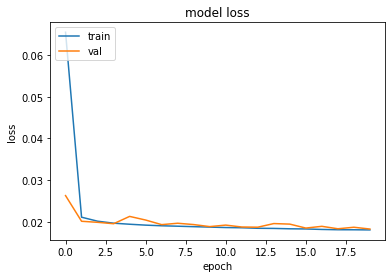

In [ ]:
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

291/291 [==============================] - 16s 55ms/step
R2_score of temperature: 0.9843824518688425
R2_score of Humidity: 0.9795515368685787


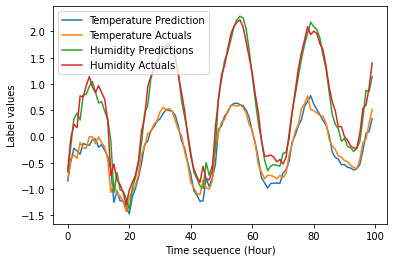

,Temperature Predictions,Temperature Actuals,Humidity Predictions,Humidity Actuals
0,-0.844636,-0.805543,-0.676960,-0.632650
1,-0.470500,-0.416534,-0.168186,-0.027525
2,-0.224467,-0.351699,0.337240,0.231815
3,-0.271883,-0.416534,0.444527,0.166980
4,-0.336989,-0.113971,0.314024,0.772105
...,...,...,...,...
95,-0.532228,-0.438145,-0.096229,0.058922
96,-0.259808,-0.113971,0.354408,0.534377
97,0.062377,-0.049136,0.879939,0.599212
98,0.092811,0.253426,0.856415,0.923386


In [ ]:
plot_predictions2(model5, scaled_test_X, scaled_test_y, 0, 100)